# Linear Regression 

## Linear Regression using numpy datastructs

In [62]:
!source myenv/bin/activate

In [63]:
from sklearn.linear_model import LinearRegression # Import the linear regression model
import matplotlib.pyplot as plt # The plotting library
import numpy as np

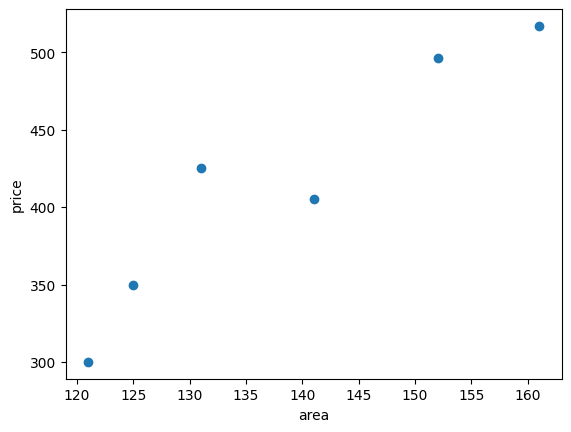

In [64]:
x = np.array([121, 125, 131, 141, 152, 161]).reshape(-1,1) # x denotes the house area as a feature.
y = np.array([300, 350, 425, 405,496,517]) # y denotes the house price.
plt.scatter(x,y)
plt.xlabel("area") # X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price.
plt.show()

In [65]:
lr = LinearRegression() # Encapsulate the linear regression model into an object.
lr.fit(x,y) # Train the model on the dataset.

LinearRegression()

In [66]:
w = lr.coef_# Slope of the model
b = lr.intercept_# Intercept of the model
print('Slope: ',w)
print('Intercept: ',b)

Slope:  [4.98467124]
Intercept:  -274.8769665187576


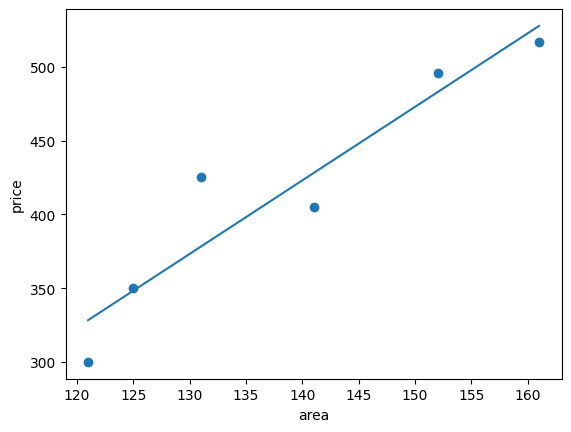

In [67]:
plt.scatter(x,y)
plt.xlabel("area") # X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price.
plt.plot([x[0],x[-1]],[x[0]*w+b,x[-1]*w+b])

In [68]:
testX = np.array([[130]])# A test sample with an area of 130
lr.predict(testX)

array([373.13029447])

## Linear Regression using imported data and pandas

In [69]:
import numpy as np
import matplotlib.pyplot as plt


In [70]:
def generate_gradient(X, theta, y):
    sample_count = X.shape[0]
    # Calculate the gradient based on the matrix 1/m ∑(((h(x^i)-y^i)) x_j^i)
    return (1./sample_count)*X.T.dot(X.dot(theta)-y)

In [71]:
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path,skiprows=1) # Ignore the title in the first row of the dataset.
    cols = orig_data.shape[1]
    return (orig_data, orig_data[:, :cols - 1], orig_data[:, cols-1:])

In [72]:
# Initialize the θ array.
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count, 1)

In [73]:
def gradient_descending(X, y, theta, alpha):
    Jthetas= []
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
    index = 0
    gradient = generate_gradient(X, theta, y) # Calculate the gradient.
    while not np.all(np.absolute(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = generate_gradient(X, theta, y)
        Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
        if (index+1) % 10 == 0:
            Jthetas.append((index, Jtheta[0])) # Record the result every 10 calculations.
        index += 1
    return theta,Jthetas

In [74]:
# Plot the loss function change curve.
def showJTheta(diff_value):
    p_x = []
    p_y = []
    for (index, sum) in diff_value:
        p_x.append(index)
        p_y.append(sum)
    plt.plot(p_x, p_y, color='b')
    plt.xlabel('steps')
    plt.ylabel('loss funtion')
    plt.title('step - loss function curve')
    plt.show()

In [75]:
# Plot the actual data points and the fitted curve.
def showlinercurve(theta, sample_training_set):
    x, y = sample_training_set[:, 1], sample_training_set[:, 2]
    z = theta[0] + theta[1] * x
    plt.scatter(x, y, color='b', marker='x',label="sample data")
    plt.plot(x, z, 'r', color="r",label="regression curve")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('liner regression curve')
    plt.legend()
    plt.show()

w:3.0076279423997594 b:1.668677412281192


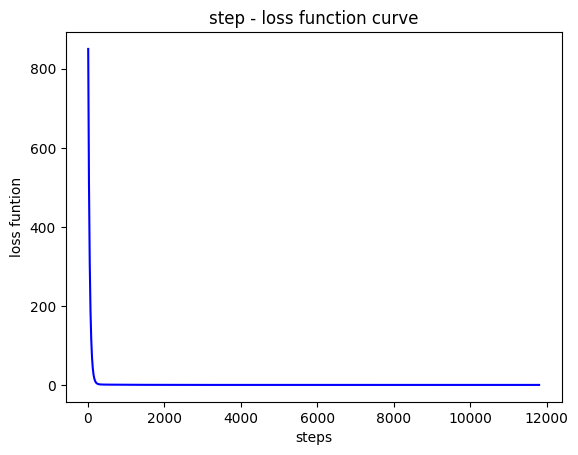

/tmp/ipykernel_8919/3948784968.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, z, 'r', color="r",label="regression curve")


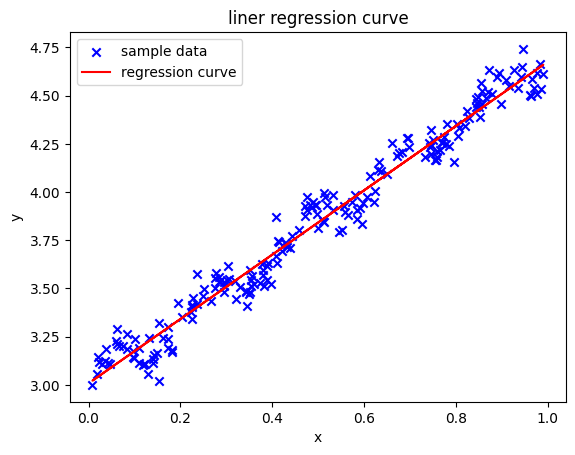

In [76]:
# Read the dataset.
training_data_include_y, training_x, y = get_training_data("lr_2.txt")
# Obtain the numbers of samples and features, respectively.
sample_count, feature_count = training_x.shape
# Define the learning step α.
alpha = 0.01
# Initialize θ.
theta = init_theta(feature_count)
# Obtain the final parameter θ and cost.
result_theta,Jthetas = gradient_descending(training_x, y, theta, alpha)
# Display the parameter.
print("w:{}".format(result_theta[0][0]),"b:{}".format(result_theta[1][0]))
showJTheta(Jthetas)
showlinercurve(result_theta, training_data_include_y)

# Logistic Regression

In [77]:
# Import StandardScaler from sklearn.preprocessing.
from sklearn.preprocessing import StandardScaler
# Import LogisticRegression from sklearn.linear_model.
from sklearn.linear_model import LogisticRegression

In [78]:
# Each item in X denotes the rent and area.
# y indicates whether to rent the room (0: no; 1: yes).
X=[[2200,15],[2750,20],[5000,40],[4000,20],[3300,20],[2000,10],[2500,12],[12000,80],
[2880,10],[2300,15],[1500,10],[3000,8],[2000,14],[2000,10],[2150,8],[3400,20],
[5000,20],[4000,10],[3300,15],[2000,12],[2500,14],[10000,100],[3150,10],
[2950,15],[1500,5],[3000,18],[8000,12],[2220,14],[6000,100],[3050,10]
]
y=[1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,0]

In [79]:
ss = StandardScaler()
X_train = ss.fit_transform(X)

In [80]:
print("X_train:\n", X_train)

X_train:
 [[-0.60583897 -0.29313058]
 [-0.37682768 -0.09050576]
 [ 0.56003671  0.71999355]
 [ 0.14365254 -0.09050576]
 [-0.14781638 -0.09050576]
 [-0.68911581 -0.49575541]
 [-0.48092372 -0.41470548]
 [ 3.47472592  2.34099218]
 [-0.32269773 -0.49575541]
 [-0.56420055 -0.29313058]
 [-0.89730789 -0.49575541]
 [-0.27273163 -0.57680534]
 [-0.68911581 -0.33365555]
 [-0.68911581 -0.49575541]
 [-0.62665818 -0.57680534]
 [-0.10617796 -0.09050576]
 [ 0.56003671 -0.09050576]
 [ 0.14365254 -0.49575541]
 [-0.14781638 -0.29313058]
 [-0.68911581 -0.41470548]
 [-0.48092372 -0.33365555]
 [ 2.64195758  3.15149149]
 [-0.21027401 -0.49575541]
 [-0.29355084 -0.29313058]
 [-0.89730789 -0.69838024]
 [-0.27273163 -0.17155569]
 [ 1.80918923 -0.41470548]
 [-0.59751129 -0.33365555]
 [ 0.97642089  3.15149149]
 [-0.25191242 -0.49575541]]


In [81]:
# Use the fit method of LogisticRegression to train model parameters.
lr = LogisticRegression()
lr.fit(X_train, y)

LogisticRegression()

In [82]:
testX = [[2000,8]]
X_test = ss.transform(testX)
print("Value to be predicted: ",X_test)
label = lr.predict(X_test)
print("predicted label = ", label)
# Output the predicted probability.
prob = lr.predict_proba(X_test)
print("probability = ",prob)

Value to be predicted:  [[-0.68911581 -0.57680534]]
predicted label =  [1]
probability =  [[0.41882379 0.58117621]]


# Decision Tree

In [84]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus

In [85]:
# Generate a decision tree.
def createTree(trainingData):
    data = trainingData.iloc[:, :-1] # Feature matrix
    labels = trainingData.iloc[:, -1] # Labels
    trainedTree = tree.DecisionTreeClassifier(criterion="entropy") # Decision tree classifier
    trainedTree.fit(data, labels) # Train the model.
    return trainedTree

In [86]:
def show_tree(trainedTree, feature_names=None, class_names=None):
    plt.figure(figsize=(16, 10))
    tree.plot_tree(
        trainedTree,
        filled=True,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        fontsize=12
    )
    plt.show()

In [87]:
def data2vectoc(data):
    names = data.columns[:-1]
    for i in names:
        col = pd.Categorical(data[i])
        data[i] = col.codes
    return data

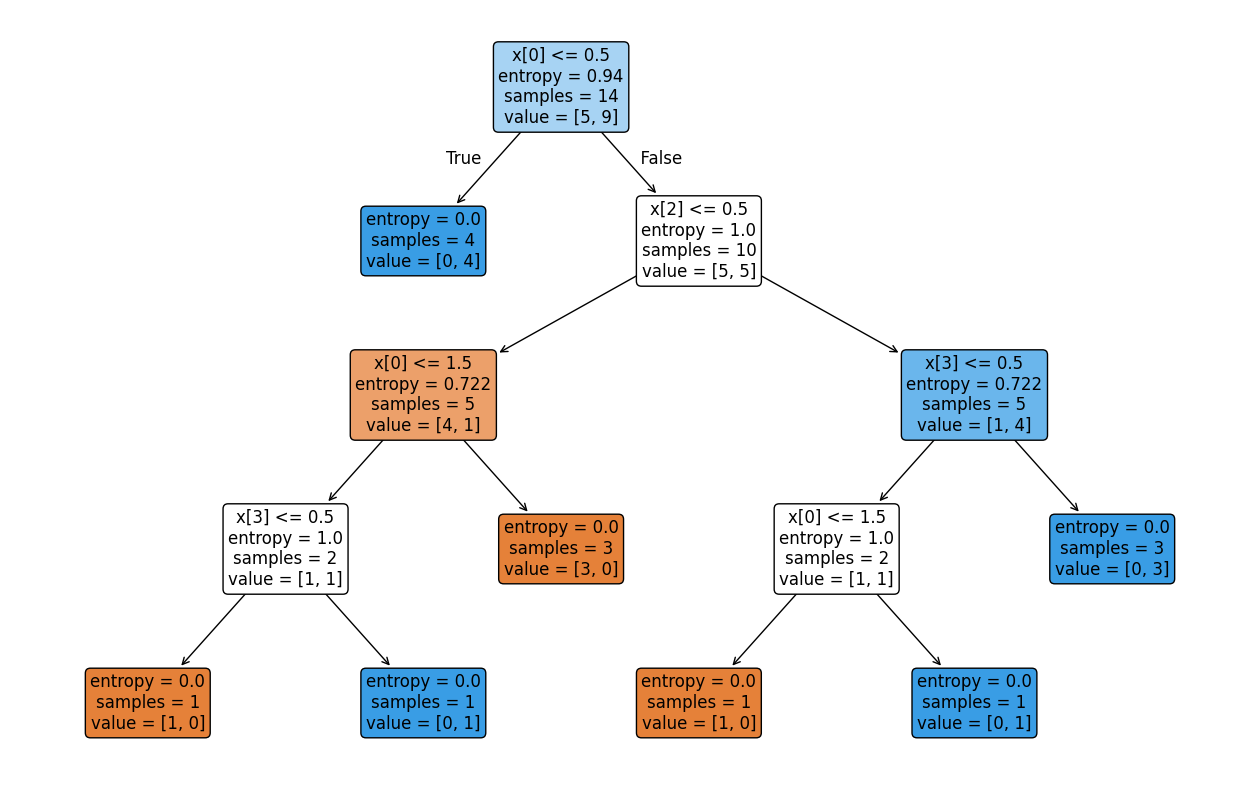

In [88]:
data = pd.read_table("tennis.txt",header=None,sep='\t') # Read training data.
trainingvec=data2vectoc(data) # Vectorize data.
decisionTree=createTree(trainingvec) # Create a decision tree.
show_tree(decisionTree)

In [90]:
testVec = [0,0,1,1] # Weather is sunny, temperature is low, humidity is high, and wind is strong.
print(decisionTree.predict(np.array(testVec).reshape(1,-1))) # Predict.

['Y']


# K-means Algorithm Implementation

In [91]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [92]:
X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

In [94]:
print("Dimension of X is {}".format(X.shape))
print("Dimension of y is {}".format(y.shape))

Dimension of X is (500, 2)
Dimension of y is (500,)


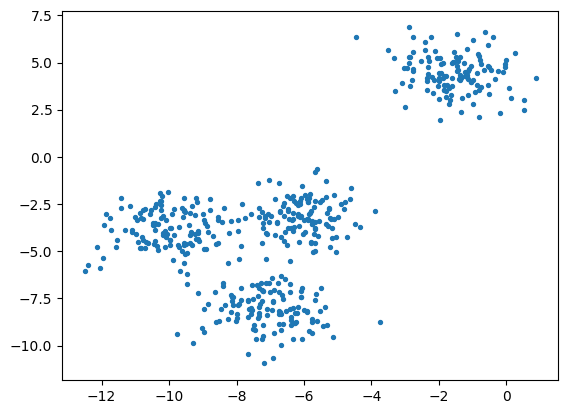

In [95]:
fig, ax1 = plt.subplots(1)
ax1.scatter(X[:, 0], X[:, 1]
    ,marker='o' # Set the shape of the point to circle.
    ,s=8 # Set the size of the point.
    )
plt.show()

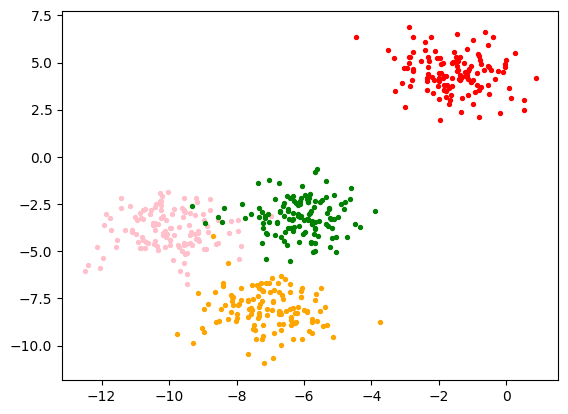

In [96]:
color = ["red","pink","orange","green"]
fig, ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y==i, 0], X[y==i, 1] # Draw the color based on the label.
        ,marker='o' # Set the shape of the point to circle.
        ,s=8 # Set the size of the point.
        ,c=color[i]
        )
plt.show()

In [97]:
n_clusters = 3
cluster1 = KMeans(n_clusters=n_clusters,random_state=3).fit(X)
y_pred1 = cluster1.labels_
print(y_pred1)

[2 2 1 0 1 0 1 1 1 1 2 2 1 0 1 2 1 2 0 1 1 1 1 0 1 1 0 0 1 1 2 0 1 2 1 2 1
 1 2 1 1 1 0 1 1 2 1 1 0 0 0 1 1 1 2 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 2 1 1 2
 1 1 2 1 1 1 0 0 1 0 0 1 1 0 1 1 0 2 1 1 0 2 2 1 2 0 0 2 0 1 0 1 1 0 0 1 1
 2 0 1 0 1 0 1 0 1 1 2 2 1 1 1 0 2 2 1 0 1 1 1 1 2 0 1 0 0 1 2 1 0 0 0 1 1
 2 2 1 1 0 2 0 1 1 1 1 1 1 1 1 1 0 2 2 2 1 0 2 1 1 2 0 1 1 1 1 2 1 1 0 2 2
 1 1 2 2 1 0 0 2 2 1 0 1 2 2 0 2 1 0 1 1 2 1 1 2 1 1 1 1 2 1 1 1 0 1 0 1 2
 1 1 1 1 1 0 1 0 2 1 2 1 0 0 1 2 0 2 1 1 2 2 2 2 1 1 2 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 2 2 1 1 1 1 0 0 1 0 1 2 0 2 0 2 2 0 2 0 0 1 1 1 1 1 1 1 2 0
 2 2 2 1 1 1 2 1 2 2 1 2 2 1 0 2 1 1 0 0 1 2 0 0 1 2 0 0 1 1 0 1 1 2 2 0 1
 2 1 0 0 1 1 1 2 1 0 0 1 0 0 0 0 2 2 1 0 1 1 2 0 1 0 1 0 1 1 1 0 1 1 2 0 2
 2 2 2 2 2 1 2 0 2 0 0 1 0 1 1 1 2 0 1 0 1 2 1 1 2 1 1 0 0 2 1 1 0 1 1 2 2
 1 2 1 1 2 1 2 1 0 2 0 1 1 0 1 1 0 2 1 0 0 1 1 1 1 2 0 2 1 0 2 2 2 1 0 1 2
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 0 1 0 1 1 1 0 0 0 1 1 1 2 1 0 1 2 0 2 0 2
 1 0 0 2 1 1 2 1 1 1 2 1 

In [98]:
centroid1 = cluster1.cluster_centers_
print(centroid1)

[[-1.54234022  4.43517599]
 [-8.0862351  -3.5179868 ]
 [-7.09306648 -8.10994454]]


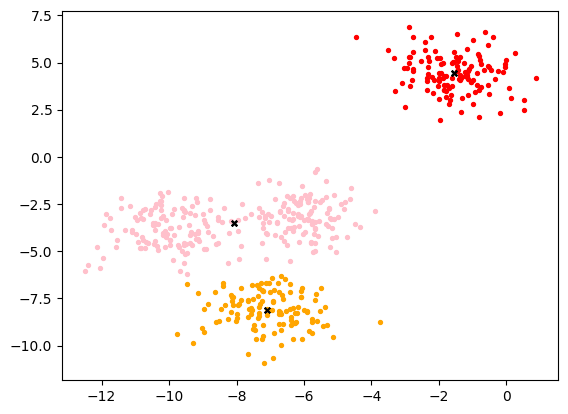

In [99]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(n_clusters):
    ax1.scatter(X[y_pred1==i, 0], X[y_pred1==i, 1]
        ,marker='o' # Set the shape of the point to circle.
        ,s=8 # Set the size of the point.
        ,c=color[i]
        )
    ax1.scatter(centroid1[:,0],centroid1[:,1]
        ,marker="x"
        ,s=15
        ,c="black")
plt.show()


In [100]:
n_clusters = 4
cluster2 = KMeans(n_clusters=n_clusters,random_state=0).fit(X)
y_pred2 = cluster2.labels_
centroid2 = cluster2.cluster_centers_
print("Centroid: {}".format(centroid2))

Centroid: [[ -6.08459039  -3.17305983]
 [-10.00969056  -3.84944007]
 [ -7.09306648  -8.10994454]
 [ -1.54234022   4.43517599]]


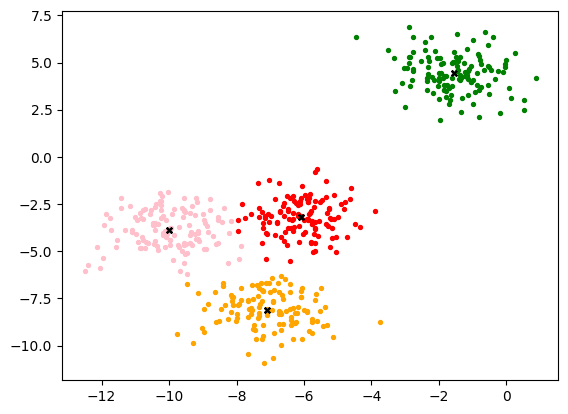

In [102]:
color = ["red","pink","orange","green"]
fig, ax1 = plt.subplots(1)
for i in range(n_clusters):
    ax1.scatter(X[y_pred2==i, 0], X[y_pred2==i, 1]
        ,marker='o' # Set the shape of the point to circle.
        ,s=8 # Set the size of the point.
        ,c=color[i]
        )
    ax1.scatter(centroid2[:,0],centroid2[:,1]
        ,marker="x"
        ,s=15
        ,c="black")
plt.show()